In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://github.com/silas-wunder/Data-Wrangling-Final-Project/blob/main/Chess_Data.pickle?raw=true"
data = pd.read_pickle(url).astype({'Game Type': 'category', 'Result': 'category', 'White ELO': 'uint16',
                                   'Black ELO': 'uint16', 'Termination': 'category', 'Moves': 'uint8'})
# drop any game that terminated with 'rules infraction', these are games with cheaters and shouldn't be considered
data.drop(data.loc[data['Termination'] ==
                   'Rules infraction'].index, inplace=True)
# drop any game that didn't have any moves
data.drop(data.loc[data['Moves'] == 0].index, inplace=True)
data.set_index(['Result', 'Game Type'], inplace=True)
data.sort_index(inplace=True)
data.head()


White ELO  Black ELO Termination  Moves
Result Game Type                                         
0-1    Blitz           1379       1558      Normal     30
       Blitz           1233       1289      Normal     17
       Blitz           2101       2249      Normal     27
       Blitz           2047       2093      Normal     34
       Blitz           1224       1349      Normal     37

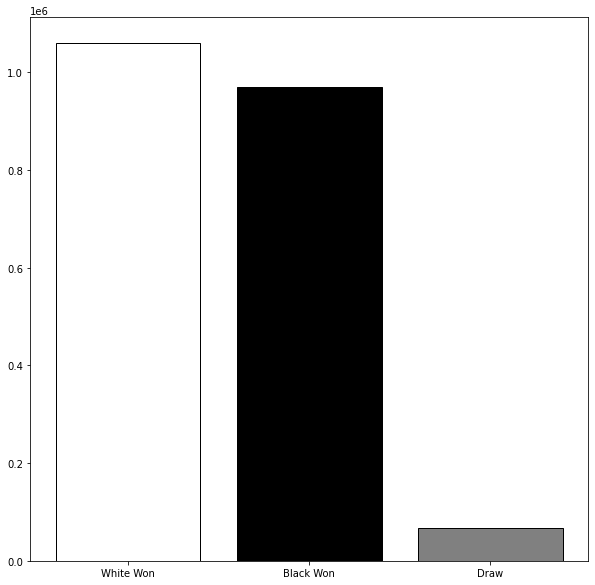

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar('White Won', len(data.loc['1-0']), color='white', edgecolor='black')
ax.bar('Black Won', len(data.loc['0-1']), color='black', edgecolor='black')
ax.bar('Draw', len(data.loc['1/2-1/2']), color='gray', edgecolor='black');


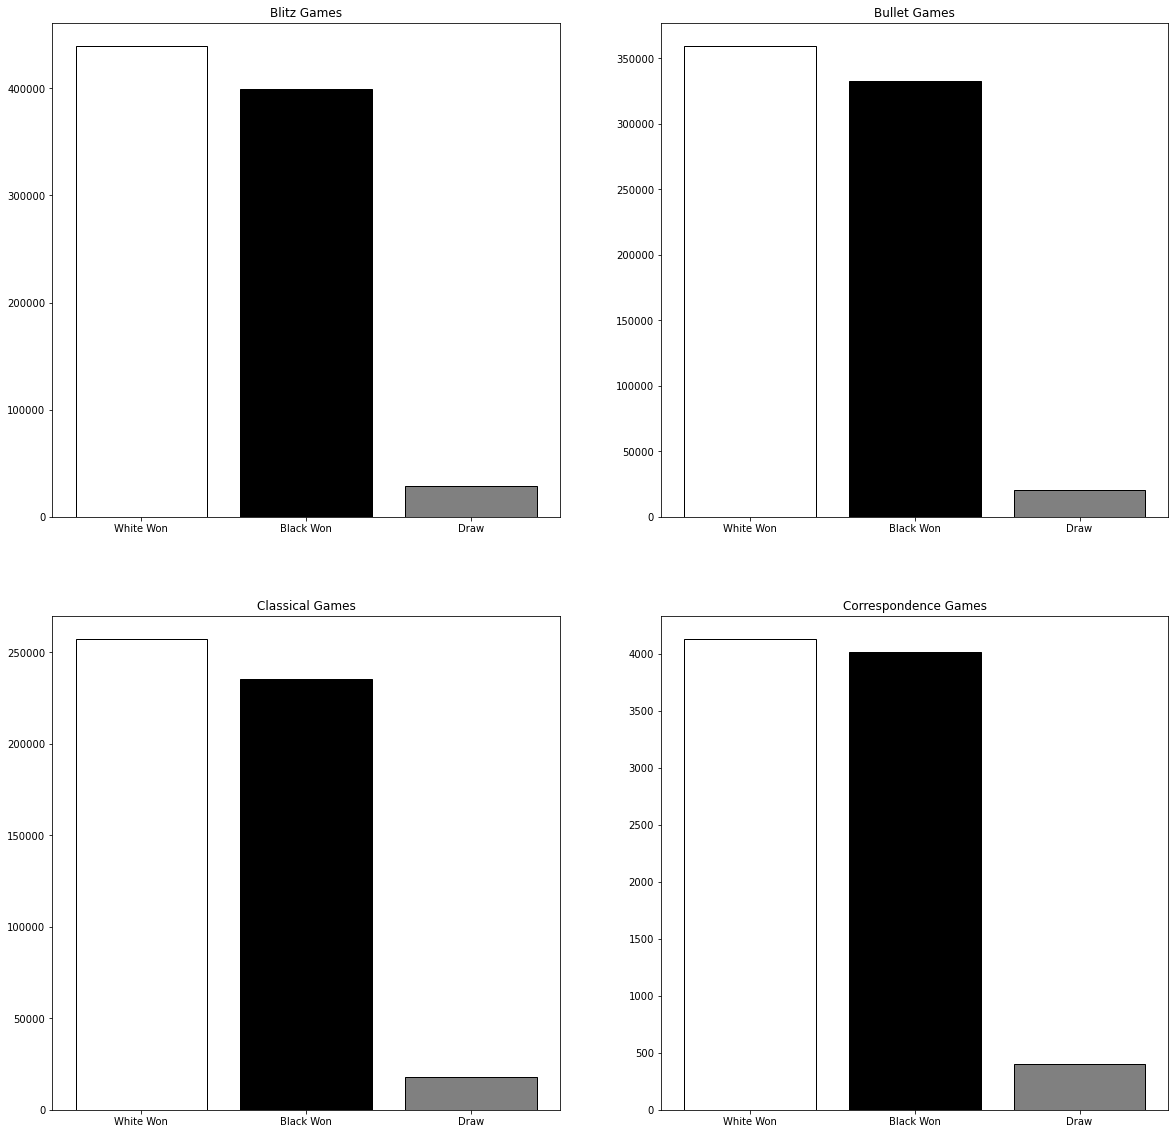

In [4]:
labels = np.array(['Blitz', 'Bullet', 'Classical', 'Correspondence'])
whiteWon0 = len(data.loc[('1-0', labels[0])])
blackWon0 = len(data.loc[('0-1', labels[0])])
draw0 = len(data.loc[('1/2-1/2', labels[0])])
whiteWon1 = len(data.loc[('1-0', labels[1])])
blackWon1 = len(data.loc[('0-1', labels[1])])
draw1 = len(data.loc[('1/2-1/2', labels[1])])
whiteWon2 = len(data.loc[('1-0', labels[2])])
blackWon2 = len(data.loc[('0-1', labels[2])])
draw2 = len(data.loc[('1/2-1/2', labels[2])])
whiteWon3 = len(data.loc[('1-0', labels[3])])
blackWon3 = len(data.loc[('0-1', labels[3])])
draw3 = len(data.loc[('1/2-1/2', labels[3])])

fig, axs = plt.subplots(2, 2, figsize=(20, 20))
axs[0, 0].bar('White Won', whiteWon0, color='white', edgecolor='black')
axs[0, 0].bar('Black Won', blackWon0, color='black', edgecolor='black')
axs[0, 0].bar('Draw', draw0, color='gray', edgecolor='black')
axs[0, 0].set_title('Blitz Games')
axs[0, 1].bar('White Won', whiteWon1, color='white', edgecolor='black')
axs[0, 1].bar('Black Won', blackWon1, color='black', edgecolor='black')
axs[0, 1].bar('Draw', draw1, color='gray', edgecolor='black')
axs[0, 1].set_title('Bullet Games')
axs[1, 0].bar('White Won', whiteWon2, color='white', edgecolor='black')
axs[1, 0].bar('Black Won', blackWon2, color='black', edgecolor='black')
axs[1, 0].bar('Draw', draw2, color='gray', edgecolor='black')
axs[1, 0].set_title('Classical Games')
axs[1, 1].bar('White Won', whiteWon3, color='white', edgecolor='black')
axs[1, 1].bar('Black Won', blackWon3, color='black', edgecolor='black')
axs[1, 1].bar('Draw', draw3, color='gray', edgecolor='black')
axs[1, 1].set_title('Correspondence Games');


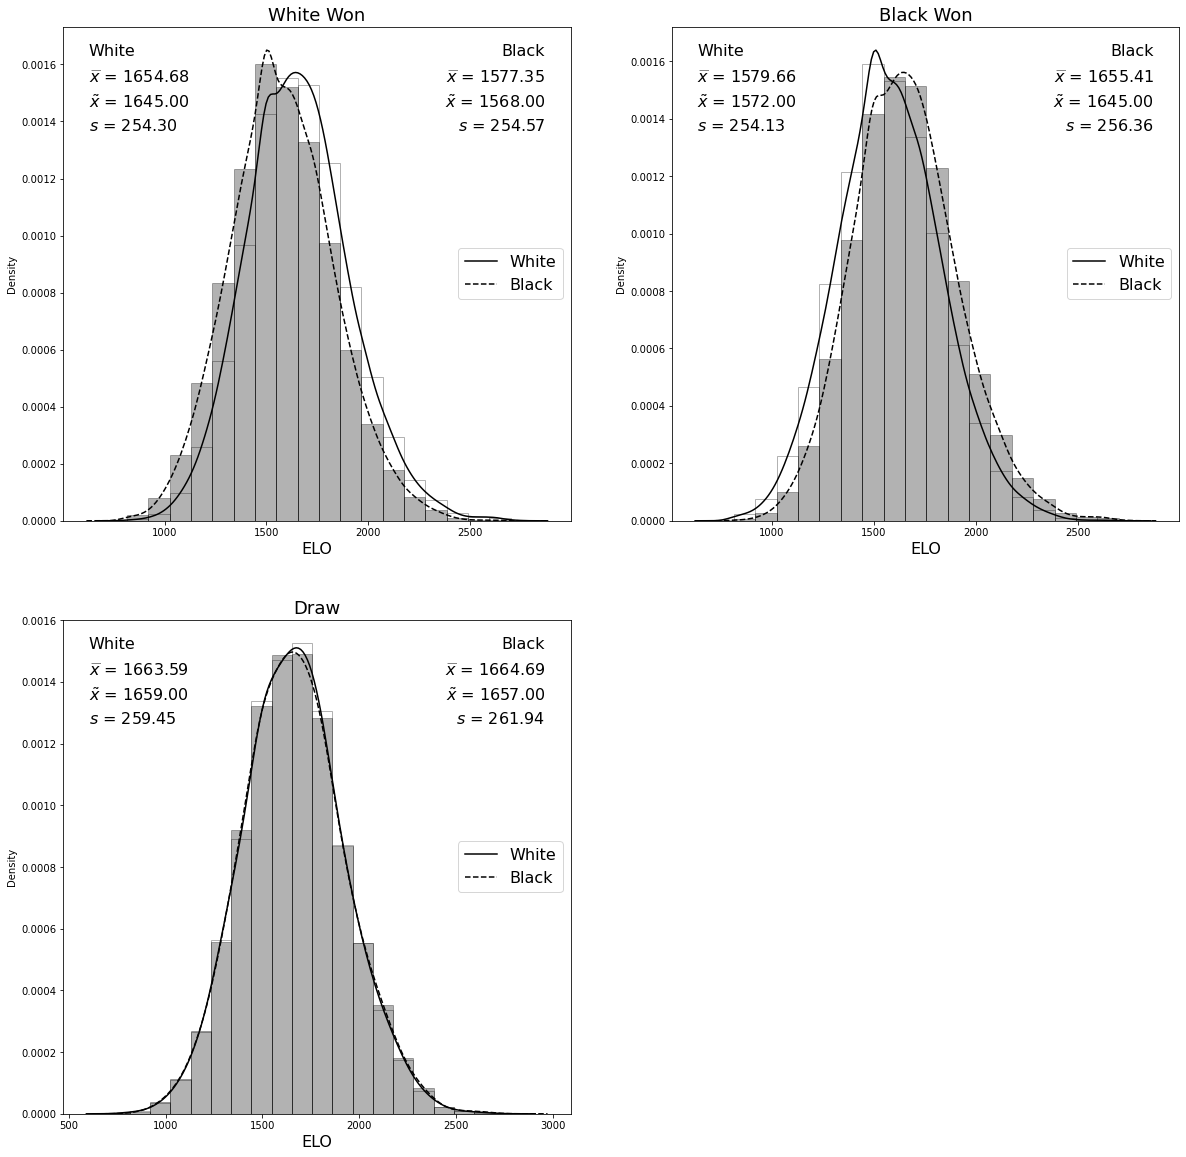

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
fig.delaxes(axs[1, 1])

# set the range so every histogram looks the same
r = (min(np.min(data['White ELO']), np.min(data['Black ELO'])), max(
    np.max(data['White ELO']), np.max(data['Black ELO'])))

# draw histograms of every ELO and overlay kernel density estimation lines
axs[0, 0].hist(data.loc['1-0']['White ELO'], bins=20, range=r,
               density=True, color='white', edgecolor='black', alpha=0.3)
sns.kdeplot(data=data.loc['1-0'][['White ELO', 'Black ELO']].reset_index(),
            x='White ELO', bw_adjust=2, ax=axs[0, 0], label='White', color='black')
axs[0, 0].hist(data.loc['1-0']['Black ELO'], bins=20, range=r,
               density=True, color='black', edgecolor='black', alpha=0.3)
sns.kdeplot(data=data.loc['1-0'][['White ELO', 'Black ELO']].reset_index(), x='Black ELO',
            bw_adjust=2, ax=axs[0, 0], label='Black', color='black', linestyle='dashed')

axs[0, 1].hist(data.loc['0-1']['White ELO'], bins=20, range=r,
               density=True, color='white', edgecolor='black', alpha=0.3)
sns.kdeplot(data=data.loc['0-1'][['White ELO', 'Black ELO']].reset_index(),
            x='White ELO', bw_adjust=2, ax=axs[0, 1], label='White', color='black')
axs[0, 1].hist(data.loc['0-1']['Black ELO'], bins=20, range=r,
               density=True, color='black', edgecolor='black', alpha=0.3)
sns.kdeplot(data=data.loc['0-1'][['White ELO', 'Black ELO']].reset_index(), x='Black ELO',
            bw_adjust=2, ax=axs[0, 1], label='Black', color='black', linestyle='dashed')

axs[1, 0].hist(data.loc['1/2-1/2']['White ELO'], bins=20, range=r,
               density=True, color='white', edgecolor='black', alpha=0.3)
sns.kdeplot(data=data.loc['1/2-1/2'][['White ELO', 'Black ELO']].reset_index(),
            x='White ELO', bw_adjust=2, ax=axs[1, 0], label='White', color='black')
axs[1, 0].hist(data.loc['1/2-1/2']['Black ELO'], bins=20, range=r,
               density=True, color='black', edgecolor='black', alpha=0.3)
sns.kdeplot(data=data.loc['1/2-1/2'][['White ELO', 'Black ELO']].reset_index(), x='Black ELO',
            bw_adjust=2, ax=axs[1, 0], label='Black', color='black', linestyle='dashed')

# add titles and labels to make graphs more informative
axs[0, 0].set_title('White Won', fontsize=18)
axs[0, 0].set_xlabel('ELO', fontsize=16)
axs[0, 0].text(0.05, 0.95, 'White', transform=axs[0, 0].transAxes, horizontalalignment='left',
               verticalalignment='center', fontsize=16)
axs[0, 0].text(0.05, 0.9, f"$\widebar{{x}}$ = {np.mean(data.loc['1-0']['White ELO']):.2f}",
               transform=axs[0, 0].transAxes, horizontalalignment='left', verticalalignment='center', fontsize=16)
axs[0, 0].text(0.05, 0.85, fr"$\tilde{{x}}$ = {np.median(data.loc['1-0']['White ELO']):.2f}",
               transform=axs[0, 0].transAxes, horizontalalignment='left', verticalalignment='center', fontsize=16)
axs[0, 0].text(0.05, 0.8, f"$s$ = {np.std(data.loc['1-0']['White ELO']):.2f}", transform=axs[0, 0].transAxes,
               horizontalalignment='left', verticalalignment='center', fontsize=16)
axs[0, 0].text(0.95, 0.95, 'Black', transform=axs[0, 0].transAxes, horizontalalignment='right',
               verticalalignment='center', fontsize=16)
axs[0, 0].text(0.95, 0.9, f"$\widebar{{x}}$ = {np.mean(data.loc['1-0']['Black ELO']):.2f}",
               transform=axs[0, 0].transAxes, horizontalalignment='right', verticalalignment='center', fontsize=16)
axs[0, 0].text(0.95, 0.85, fr"$\tilde{{x}}$ = {np.median(data.loc['1-0']['Black ELO']):.2f}",
               transform=axs[0, 0].transAxes, horizontalalignment='right', verticalalignment='center', fontsize=16)
axs[0, 0].text(0.95, 0.8, f"$s$ = {np.std(data.loc['1-0']['Black ELO']):.2f}", transform=axs[0, 0].transAxes,
               horizontalalignment='right', verticalalignment='center', fontsize=16)
axs[0, 0].legend(loc='center right', fontsize=16)

# add titles and labels to make graphs more informative
axs[0, 1].set_title('Black Won', fontsize=18)
axs[0, 1].set_xlabel('ELO', fontsize=16)
axs[0, 1].text(0.05, 0.95, 'White', transform=axs[0, 1].transAxes, horizontalalignment='left',
               verticalalignment='center', fontsize=16)
axs[0, 1].text(0.05, 0.9, f"$\widebar{{x}}$ = {np.mean(data.loc['0-1']['White ELO']):.2f}",
               transform=axs[0, 1].transAxes, horizontalalignment='left', verticalalignment='center', fontsize=16)
axs[0, 1].text(0.05, 0.85, fr"$\tilde{{x}}$ = {np.median(data.loc['0-1']['White ELO']):.2f}",
               transform=axs[0, 1].transAxes, horizontalalignment='left', verticalalignment='center', fontsize=16)
axs[0, 1].text(0.05, 0.8, f"$s$ = {np.std(data.loc['0-1']['White ELO']):.2f}", transform=axs[0, 1].transAxes,
               horizontalalignment='left', verticalalignment='center', fontsize=16)
axs[0, 1].text(0.95, 0.95, 'Black', transform=axs[0, 1].transAxes, horizontalalignment='right',
               verticalalignment='center', fontsize=16)
axs[0, 1].text(0.95, 0.9, f"$\widebar{{x}}$ = {np.mean(data.loc['0-1']['Black ELO']):.2f}",
               transform=axs[0, 1].transAxes, horizontalalignment='right', verticalalignment='center', fontsize=16)
axs[0, 1].text(0.95, 0.85, fr"$\tilde{{x}}$ = {np.median(data.loc['0-1']['Black ELO']):.2f}",
               transform=axs[0, 1].transAxes, horizontalalignment='right', verticalalignment='center', fontsize=16)
axs[0, 1].text(0.95, 0.8, f"$s$ = {np.std(data.loc['0-1']['Black ELO']):.2f}", transform=axs[0, 1].transAxes,
               horizontalalignment='right', verticalalignment='center', fontsize=16)
axs[0, 1].legend(loc='center right', fontsize=16)

# add titles and labels to make graphs more informative
axs[1, 0].set_title('Draw', fontsize=18)
axs[1, 0].set_xlabel('ELO', fontsize=16)
axs[1, 0].text(0.05, 0.95, 'White', transform=axs[1, 0].transAxes, horizontalalignment='left',
               verticalalignment='center', fontsize=16)
axs[1, 0].text(0.05, 0.9, f"$\widebar{{x}}$ = {np.mean(data.loc['1/2-1/2']['White ELO']):.2f}",
               transform=axs[1, 0].transAxes, horizontalalignment='left', verticalalignment='center', fontsize=16)
axs[1, 0].text(0.05, 0.85, fr"$\tilde{{x}}$ = {np.median(data.loc['1/2-1/2']['White ELO']):.2f}",
               transform=axs[1, 0].transAxes, horizontalalignment='left', verticalalignment='center', fontsize=16)
axs[1, 0].text(0.05, 0.8, f"$s$ = {np.std(data.loc['1/2-1/2']['White ELO']):.2f}", transform=axs[1, 0].transAxes,
               horizontalalignment='left', verticalalignment='center', fontsize=16)
axs[1, 0].text(0.95, 0.95, 'Black', transform=axs[1, 0].transAxes, horizontalalignment='right',
               verticalalignment='center', fontsize=16)
axs[1, 0].text(0.95, 0.9, f"$\widebar{{x}}$ = {np.mean(data.loc['1/2-1/2']['Black ELO']):.2f}",
               transform=axs[1, 0].transAxes, horizontalalignment='right', verticalalignment='center', fontsize=16)
axs[1, 0].text(0.95, 0.85, fr"$\tilde{{x}}$ = {np.median(data.loc['1/2-1/2']['Black ELO']):.2f}",
               transform=axs[1, 0].transAxes, horizontalalignment='right', verticalalignment='center', fontsize=16)
axs[1, 0].text(0.95, 0.8, f"$s$ = {np.std(data.loc['1/2-1/2']['Black ELO']):.2f}", transform=axs[1, 0].transAxes,
               horizontalalignment='right', verticalalignment='center', fontsize=16)
axs[1, 0].legend(loc='center right', fontsize=16);


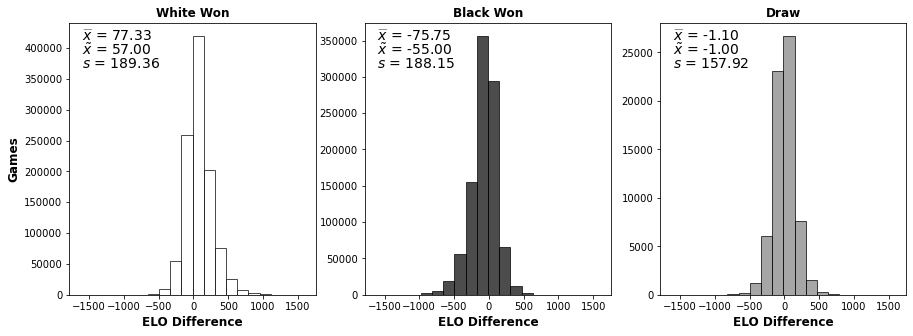

In [6]:
data['ELO Difference'] = (
    data['White ELO'] - data['Black ELO']).astype('int16')
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
r = (np.min(data['ELO Difference']), np.max(data['ELO Difference']))

axs[0].hist(data.loc['1-0']['ELO Difference'], bins=20, range=r,
            color='white', edgecolor='black', alpha=0.7)
axs[1].hist(data.loc['0-1']['ELO Difference'], bins=20, range=r,
            color='black', edgecolor='black', alpha=0.7)
axs[2].hist(data.loc['1/2-1/2']['ELO Difference'], bins=20,
            range=r, color='gray', edgecolor='black', alpha=0.7)


def add_info(ax, pNum, result, title):
    ax[pNum].set_title(title, size='large', fontweight='bold')
    ax[pNum].set_xlabel('ELO Difference', size='large', fontweight='bold')
    ax[pNum].text(0.05, 0.95, f"$\widebar{{x}}$ = {np.mean(data.loc[result]['ELO Difference']):.2f}",
                  transform=ax[pNum].transAxes, horizontalalignment='left', verticalalignment='center', fontsize=14)
    ax[pNum].text(0.05, 0.9, fr"$\tilde{{x}}$ = {np.median(data.loc[result]['ELO Difference']):.2f}",
                  transform=ax[pNum].transAxes, horizontalalignment='left', verticalalignment='center', fontsize=14)
    ax[pNum].text(0.05, 0.85, f"$s$ = {np.std(data.loc[result]['ELO Difference']):.2f}",
                  transform=ax[pNum].transAxes, horizontalalignment='left', verticalalignment='center', fontsize=14)


add_info(axs, 0, '1-0', 'White Won')
add_info(axs, 1, '0-1', 'Black Won')
add_info(axs, 2, '1/2-1/2', 'Draw')
axs[0].set_ylabel('Games', size='large', fontweight='bold');


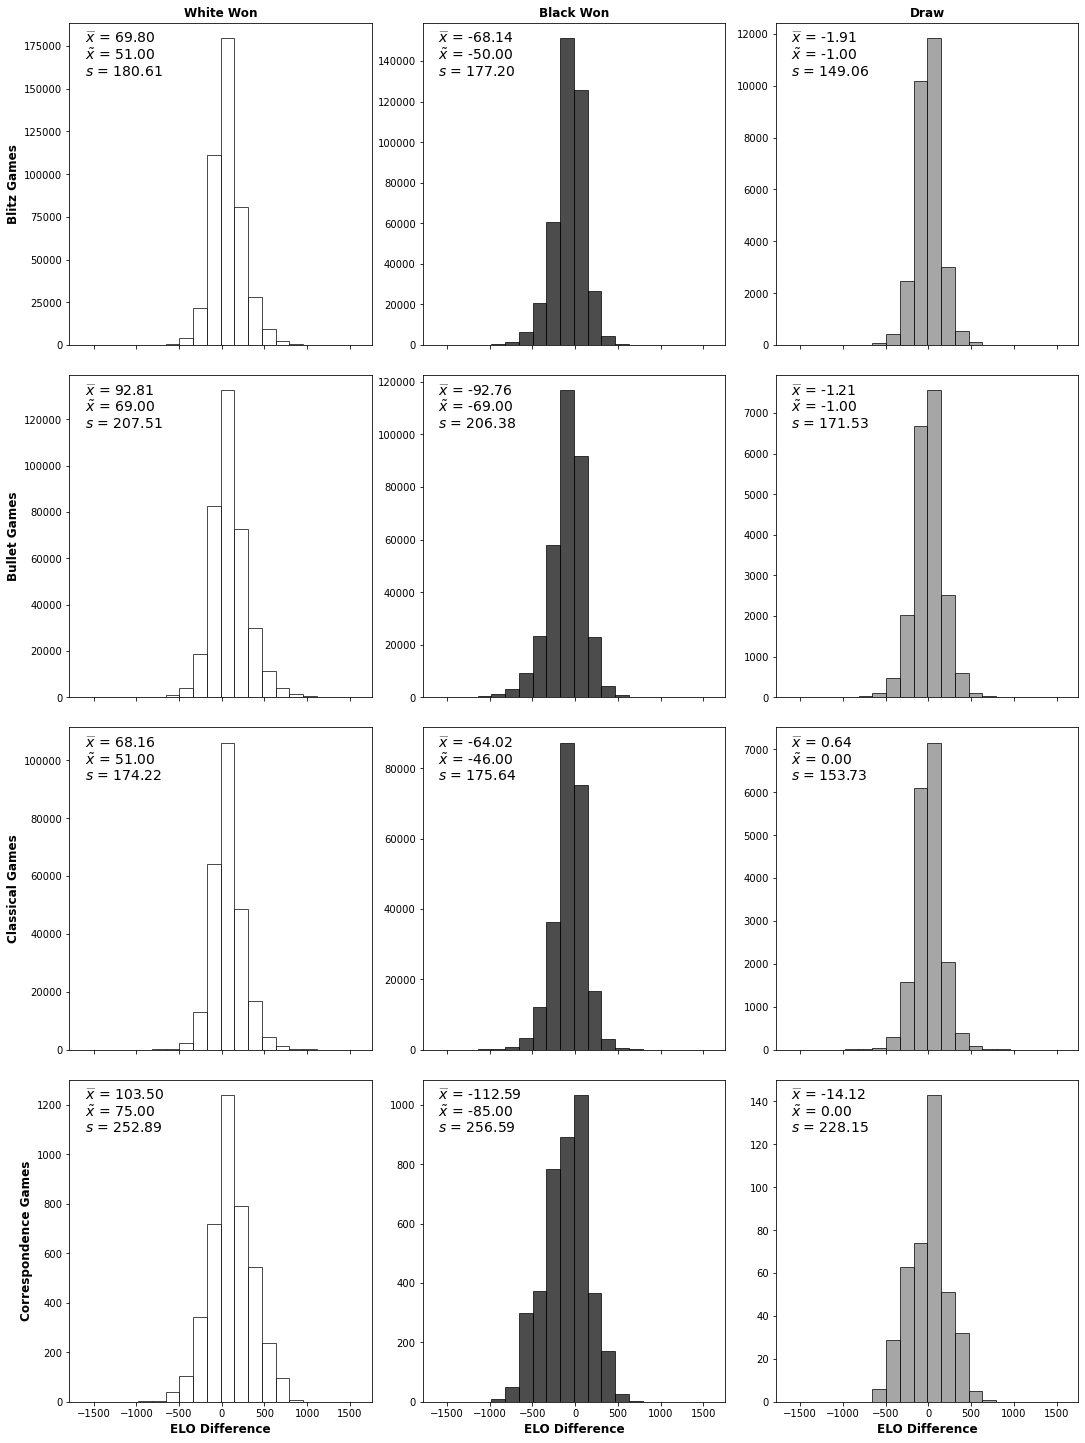

In [7]:
fig, axs = plt.subplots(4, 3, figsize=(15, 20), sharex=True)
fig.tight_layout(pad=2)
gameTypes = ['Blitz', 'Bullet', 'Classical', 'Correspondence']
results = ['1-0', '0-1', '1/2-1/2']
colors = ['white', 'black', 'gray']
r = (np.min(data['ELO Difference']), np.max(data['ELO Difference']))

for i in range(4):
    for j in range(3):
        axs[i, j].hist(data.loc[results[j], gameTypes[i]]['ELO Difference'],
                       bins=20, range=r, color=colors[j], edgecolor='black', alpha=0.7)
        axs[i, j].text(0.05, 0.95, f"$\widebar{{x}}$ = {np.mean(data.loc[results[j], gameTypes[i]]['ELO Difference']):.2f}",
                       transform=axs[i, j].transAxes, horizontalalignment='left', verticalalignment='center', fontsize=14)
        axs[i, j].text(0.05, 0.9, rf"$\tilde{{x}}$ = {np.median(data.loc[results[j], gameTypes[i]]['ELO Difference']):.2f}",
                       transform=axs[i, j].transAxes, horizontalalignment='left', verticalalignment='center', fontsize=14)
        axs[i, j].text(0.05, 0.85, f"$s$ = {np.std(data.loc[results[j], gameTypes[i]]['ELO Difference']):.2f}",
                       transform=axs[i, j].transAxes, horizontalalignment='left', verticalalignment='center', fontsize=14)

axs[0, 0].set_title('White Won', fontweight='bold', size='large')
axs[0, 1].set_title('Black Won', fontweight='bold', size='large')
axs[0, 2].set_title('Draw', fontweight='bold', size='large')
axs[0, 0].set_ylabel('Blitz Games', fontweight='bold', size='large')
axs[1, 0].set_ylabel('Bullet Games', fontweight='bold', size='large')
axs[2, 0].set_ylabel('Classical Games', fontweight='bold', size='large')
axs[3, 0].set_ylabel('Correspondence Games', fontweight='bold', size='large')
axs[3, 0].set_xlabel('ELO Difference', fontweight='bold', size='large')
axs[3, 1].set_xlabel('ELO Difference', fontweight='bold', size='large')
axs[3, 2].set_xlabel('ELO Difference', fontweight='bold', size='large');


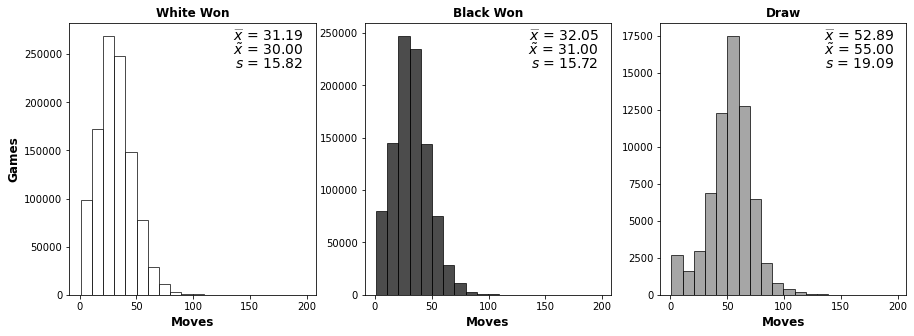

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
r = (np.min(data['Moves']), np.max(data['Moves']))

axs[0].hist(data.loc['1-0']['Moves'], bins=20, range=r, color='white', edgecolor='black', alpha=0.7)
axs[1].hist(data.loc['0-1']['Moves'], bins=20, range=r, color='black', edgecolor='black', alpha=0.7)
axs[2].hist(data.loc['1/2-1/2']['Moves'], bins=20, range=r, color='gray', edgecolor='black', alpha=0.7)

def add_info(ax, pNum, result, title):
     ax[pNum].set_title(title, size='large', fontweight='bold')
     ax[pNum].set_xlabel('Moves', size='large', fontweight='bold')
     ax[pNum].text(0.95, 0.95, f"$\widebar{{x}}$ = {np.mean(data.loc[result]['Moves']):.2f}", transform=ax[pNum].transAxes, horizontalalignment='right', verticalalignment='center', fontsize=14)
     ax[pNum].text(0.95, 0.9, fr"$\tilde{{x}}$ = {np.median(data.loc[result]['Moves']):.2f}", transform=ax[pNum].transAxes, horizontalalignment='right', verticalalignment='center', fontsize=14)
     ax[pNum].text(0.95, 0.85, f"$s$ = {np.std(data.loc[result]['Moves']):.2f}", transform=ax[pNum].transAxes, horizontalalignment='right', verticalalignment='center', fontsize=14)

add_info(axs, 0, '1-0', 'White Won')
add_info(axs, 1, '0-1', 'Black Won')
add_info(axs, 2, '1/2-1/2', 'Draw')
axs[0].set_ylabel('Games', size='large', fontweight='bold');

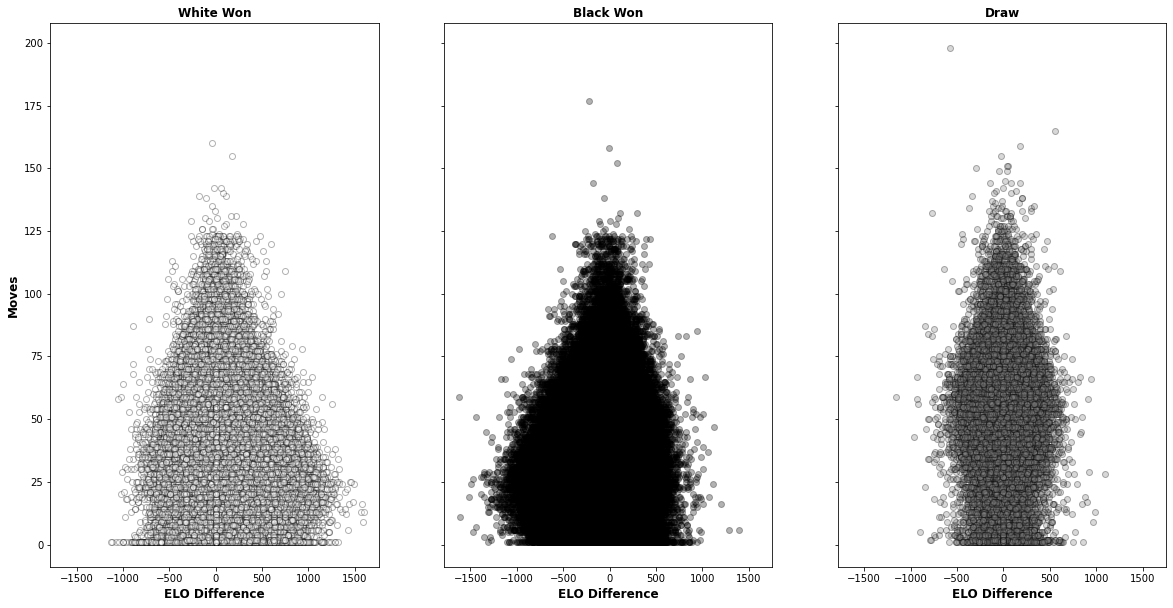

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(20,10), sharex=True, sharey=True)

axs[0].scatter(data.loc['1-0']['ELO Difference'], data.loc['1-0']['Moves'], c='white', edgecolors='black', alpha=0.3)
axs[1].scatter(data.loc['0-1']['ELO Difference'], data.loc['0-1']['Moves'], c='black', edgecolors='black', alpha=0.3)
axs[2].scatter(data.loc['1/2-1/2']['ELO Difference'], data.loc['1/2-1/2']['Moves'], c='gray', edgecolors='black', alpha=0.3)

axs[0].set_title('White Won', fontweight='bold', size='large')
axs[0].set_xlabel('ELO Difference', fontweight='bold', size='large')
axs[1].set_title('Black Won', fontweight='bold', size='large')
axs[1].set_xlabel('ELO Difference', fontweight='bold', size='large')
axs[2].set_title('Draw', fontweight='bold', size='large')
axs[2].set_xlabel('ELO Difference', fontweight='bold', size='large')
axs[0].set_ylabel('Moves', fontweight='bold', size='large');